In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import yfinance as yf

<h3><b>Project Overview</b></h3>

<h4><b>Objective</b></h4>
To analyze portfolio risks and calculate Value at Risk (VaR) and the Expected Shortfall (ES).

<h4><b>Scope</b></h4>

- Data range: 2019–2024
- Stocks: Selected from Saudi stock market index

<h4><b>Summary</b></h4>
The project calculates daily and weekly VaR using historical methods.


In [2]:
asset_list = ["2222.SR", "1120.SR",
              "1180.SR", "2010.SR",
              "7010.SR", "1211.SR",
              "1010.SR", "1140.SR",
              "1150.SR", "5110.SR"]

end_date = dt.datetime.now()

years = 5

start_date = (end_date - dt.timedelta(days = 365 * 5))

asset_data = yf.download(asset_list, start=start_date, end=end_date)

asset_data.head()

[*********************100%***********************]  10 of 10 completed


Price                      Adj Close                                   \
Ticker                       1010.SR    1120.SR    1140.SR    1150.SR   
Date                                                                    
2019-12-04 00:00:00+00:00  18.106840  35.229511  14.581791  12.251425   
2019-12-05 00:00:00+00:00  18.416777  35.341354  14.609995  12.272695   
2019-12-08 00:00:00+00:00  19.248714  35.900547  14.976657  12.761900   
2019-12-09 00:00:00+00:00  19.069277  35.509113  15.117680  12.846980   
2019-12-10 00:00:00+00:00  19.004026  35.341354  15.145885  12.761900   

Price                                                                          \
Ticker                       1180.SR    1211.SR    2010.SR 2222.SR    5110.SR   
Date                                                                            
2019-12-04 00:00:00+00:00  28.412203  13.950000  73.038429     NaN  17.233568   
2019-12-05 00:00:00+00:00  28.977312  13.783333  72.394913     NaN  17.318544   
2019-12-08 00:00:00+00:00  29.887754  14.050000  74.647202     NaN  17.403522   
2019-12-09 00:00:00+00:00  30.547043  13.933333  74.808060     NaN  17.131592   
2019-12-10 00:00:00+00:00  29.950542  13.833333  74.164574     NaN  17.165585   

Price                                 ...     Volume                       \
Ticker                       7010.SR  ...    1010.SR     1120.SR  1140.SR   
Date                                  ...                                   
2019-12-04 00:00:00+00:00  29.877466  ...  1000777.0   7999531.0   444434   
2019-12-05 00:00:00+00:00  30.327234  ...  2232565.0   6305040.0   371168   
2019-12-08 00:00:00+00:00  31.258892  ...  1065563.0  12153502.0   890266   
2019-12-09 00:00:00+00:00  31.644409  ...  2587180.0  14222320.0  2541562   
2019-12-10 00:00:00+00:00  32.029922  ...  1046153.0   9579592.0   771299   

Price                                                                         \
Ticker                      1150.SR    1180.SR    1211.SR    2010.SR 2222.SR   
Date                                                                           
2019-12-04 00:00:00+00:00  15532511  1436525.0  1217778.0  1557870.0     NaN   
2019-12-05 00:00:00+00:00  10619809  1252466.0   612480.0  1387642.0     NaN   
2019-12-08 00:00:00+00:00  25087992  1895869.0   762675.0  2386308.0     NaN   
2019-12-09 00:00:00+00:00  34107429  3998987.0  2165856.0  2422829.0     NaN   
2019-12-10 00:00:00+00:00  20024154  1392495.0  1995369.0  1721155.0     NaN   

Price                                         
Ticker                      5110.SR  7010.SR  
Date                                          
2019-12-04 00:00:00+00:00  473747.0   729252  
2019-12-05 00:00:00+00:00  334847.0  1179780  
2019-12-08 00:00:00+00:00  280753.0  4096997  
2019-12-09 00:00:00+00:00  818872.0  3747685  
2019-12-10 00:00:00+00:00  408576.0  2087177  

[5 rows x 60 columns]

In [3]:
asset_data = asset_data.stack()

asset_data["ticker"] = asset_data.index.get_level_values(level  = "Ticker").astype(str)

asset_data = asset_data.droplevel(level = "Ticker")

asset_data.head()

C:\Users\pc\AppData\Local\Temp\ipykernel_14856\82211640.py:1: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  asset_data = asset_data.stack()


Price,Adj Close,Close,High,Low,Open,Volume,ticker
Date,,,,,,,
2019-12-04 00:00:00+00:00,18.106840,22.200001,22.400000,22.059999,22.360001,1000777.0,1010.SR
2019-12-04 00:00:00+00:00,35.229511,39.375000,39.500000,39.062500,39.500000,7999531.0,1120.SR
2019-12-04 00:00:00+00:00,14.581791,15.510003,15.660003,15.510003,15.540003,444434.0,1140.SR
2019-12-04 00:00:00+00:00,12.251425,13.824003,13.872003,13.716003,13.860003,15532511.0,1150.SR
2019-12-04 00:00:00+00:00,28.412203,33.937500,34.200001,33.674999,34.162498,1436525.0,1180.SR


In [4]:
asset_df = asset_data.rename(columns = {"Adj Close": "adj_close"})

asset_df = asset_df[["ticker", "adj_close"]]
asset_df = asset_df.pivot(columns = "ticker", values = "adj_close")

asset_df.head()

ticker,1010.SR,1120.SR,1140.SR,1150.SR,1180.SR,1211.SR,2010.SR,2222.SR,5110.SR,7010.SR
Date,,,,,,,,,,
2019-12-04 00:00:00+00:00,18.106840,35.229511,14.581791,12.251425,28.412203,13.950000,73.038429,NaN,17.233568,29.877466
2019-12-05 00:00:00+00:00,18.416777,35.341354,14.609995,12.272695,28.977312,13.783333,72.394913,NaN,17.318544,30.327234
2019-12-08 00:00:00+00:00,19.248714,35.900547,14.976657,12.761900,29.887754,14.050000,74.647202,NaN,17.403522,31.258892
2019-12-09 00:00:00+00:00,19.069277,35.509113,15.117680,12.846980,30.547043,13.933333,74.808060,NaN,17.131592,31.644409
2019-12-10 00:00:00+00:00,19.004026,35.341354,15.145885,12.761900,29.950542,13.833333,74.164574,NaN,17.165585,32.029922


In [5]:
#ensure there are no missing values within the dataframe

print(asset_df.shape)

print(asset_df.isnull().sum())

#fill the null values with 0s

asset_df = asset_df.fillna(0)

asset_df.head()

asset_df.isnull().sum()

(1247, 10)
ticker
1010.SR    1
1120.SR    1
1140.SR    0
1150.SR    0
1180.SR    1
1211.SR    1
2010.SR    1
2222.SR    5
5110.SR    1
7010.SR    0
dtype: int64


ticker
1010.SR    0
1120.SR    0
1140.SR    0
1150.SR    0
1180.SR    0
1211.SR    0
2010.SR    0
2222.SR    0
5110.SR    0
7010.SR    0
dtype: int64

In [6]:
n_assets = asset_data["ticker"].nunique()

#calculate the log of returns

log_returns  = np.log1p(asset_df.pct_change())

#randomize the weights
weights = np.random.random(n_assets)

weights_rebal = weights / sum(weights)

weights_rebal

#calculate the historical returns

historical_returns = (log_returns * weights_rebal).sum(axis = 1)

historical_returns

rolling_day = 5

range_returns = historical_returns.rolling(window = rolling_day).sum()

range_returns = range_returns.dropna()

c:\Users\pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\internals\blocks.py:393: RuntimeWarning: divide by zero encountered in log1p
  result = func(self.values, **kwargs)


In [42]:
confidence_interval = 0.95

#assume a portfolio value of 1,000,000 riyals
portfolio_val = 1000000

VaR = np.percentile(range_returns, 100 - (confidence_interval * 100))*portfolio_val

#calculate the expected shortfall

unscaled_VaR = np.percentile(range_returns, 100 - (confidence_interval * 100))
ES = range_returns[range_returns <= unscaled_VaR].mean()*portfolio_val


print(f"Value at Risk (VaR): {round(VaR,2)} Riyals")
print(f"Expected Shortfall (ES): {round(ES, 2)} Riyals")


Value at Risk (VaR): -42474.46 Riyals
Expected Shortfall (ES): -63427.37 Riyals


**NOTE: Keep in mind that results may vary each run due to the presence of the randomized weights within the code.**
<h4>

<h3><b>Interpretation of the Value at Risk (VaR)</b></h3>

* Since our confidence interval interval is 95%, we can state that there is a 95% probability that the portfolio will not lose more than 42,474 SAR in a given day (or the specified period).

* Conversely, there is a 5% probability that the loss will exceed 42,474 SAR.

This value gives us a measure of the worst-case scenario under normal market conditions, helping assess how much capital should be reserved to cover unexpected losses.


**For instance:** If your portfolio is worth 1,000,000 SAR, a VaR of 42,474 SAR daily means 5% of your portfolio value is at risk each day.

This can be used in making decisions for:
1. **Portfolio Managers:** To determine if the portfolio aligns with the risk tolerance.

2. **Stress Testing:** Helps identify how the portfolio might perform under extreme market scenarios.

3. **Capital Allocation:** Guides reserves needed to safeguard against unexpected losses.


Keep in mind VaR assumes normal market conditions and may not account for extreme events (tail risks).


<hr>

<h3><b>Interpretation of the Expected Shortfall (ES)</b></h3>

**Expected Shortfall (ES):** Expected Shortfall is the average of losses beyond the Value at Risk for a given confidence level. It addresses VaR's limitations by capturing the severity of losses in the tail of the distribution and satisfying the properties of a coherent risk.

* Expected Shortfall (ES): Represents the average loss beyond the Value at Risk threshold.
  * In this case:
    * the average loss in those extreme cases would be 63,427.37 Riyals.
    * It complements the VaR by showing the severity of potential losses in the worst-case scenarios.


<h4><b>Why do we need the Expected Shortfall?</b></h4>

* The Expected Shortfall helps us capture the magnitude of extreme losses, while VaR only identifies the threshold of such events.

* For Risk Management:
  * A high ES indicates a significant tail risk - potentially devastating losses in extreme scenarios.
  * Such values can guide decisions about risk mitigation, portfolio adjustments, or increasing hedging strategies.

<hr>

<hr>

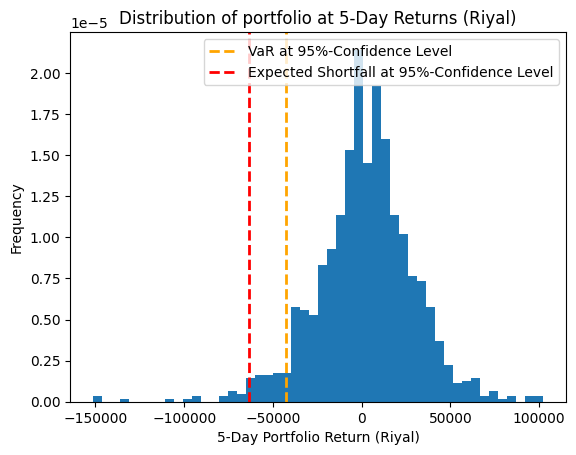

In [43]:
#plot the results
range_returns_window = range_returns*portfolio_val
plt.hist(range_returns_window, bins = 50, density = True)
plt.xlabel(f"{rolling_day}-Day Portfolio Return (Riyal)")
plt.ylabel("Frequency")
plt.title(f"Distribution of portfolio at {rolling_day}-Day Returns (Riyal)")
plt.axvline(VaR, color = "orange", linestyle = "dashed", linewidth = 2, label = f"VaR at {confidence_interval:.0%}-Confidence Level")
plt.axvline(ES, color = "red", linestyle = "dashed", linewidth = 2, label = f"Expected Shortfall at {confidence_interval:.0%}-Confidence Level")

plt.legend()
plt.show()